<h1>Prediction for Boston Housing Prices</h1>

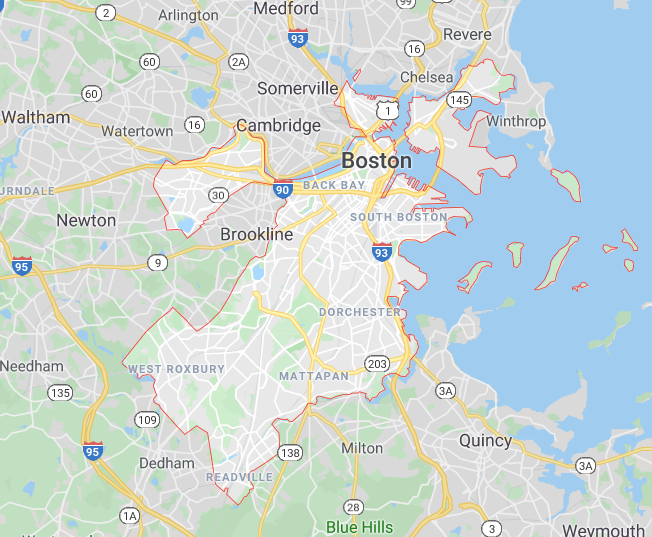

<h1>Dataset Feature Overview</h1>
<p>CRIM - per capita crime rate by town</p>
<p>ZN - proportion of residential land zoned for lots over 25000 sq.ft.</p>
<p>INDUS - proportion of non-retail business acres per town</p>
<p>CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</p>
<p>NOX - nitric oxides concentration (parts per 10 million)</p>
<p>RM - average number of rooms per dwelling</p>
<p>AGE - proportion of owner-occupied units built prior to 1940</p>
<p>DIS - weighted distances to five Boston employment centres</p>
<p>RAD - index of accessibility to radial highways</p>
<p>TAX - full-value property-tax rate per $10000</p>
<p>PTRATIO - Pupil-techer ratio by town</p>
<p>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</p>
<p>LSTAT - % lower status of the population</p>
<p>MEDV (TARGET) - Median value of owner-occupied homes in 1000</p>

<h1>Introduction</h1>

<p>In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home’s monetary value.</p>

<p>The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.</p>

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('C:/Users/Sagar/Desktop/ML/boston_house_prices.csv')
prices1 = data['MEDV']
features1 = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [47]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


<h1>Exploratory Data Analysis (EDA)</h1>
<p>EDA is the process of understanding what the data is telling us by calculating statistics and creating charts and figures. These statistics and charts can help find anomalies which could impact our analysis or find relationships and trends between the various features in our data. EDA starts off at a high level but narrows in scope as we find interesting patterns and relationships in our data.</p>

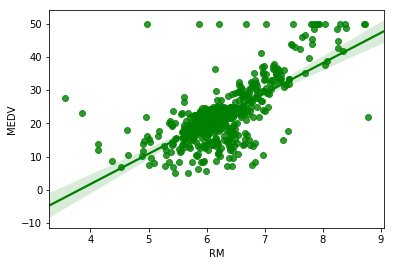

In [49]:
sns.regplot(data['RM'],prices1,color="g")
plt.show()

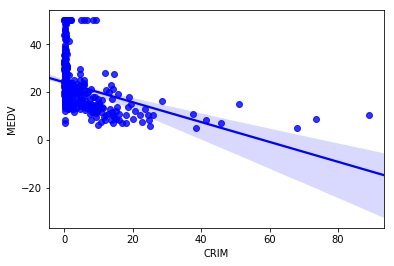

In [129]:
sns.regplot(data['CRIM'],prices1,color="b")
plt.show()

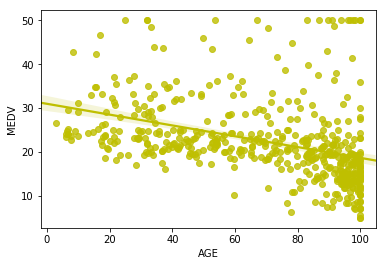

In [51]:
sns.regplot(data['AGE'],prices1,color="y")
plt.show()

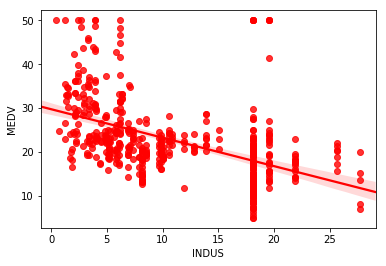

In [52]:
sns.regplot(data['INDUS'],prices1,color="r")
plt.show()

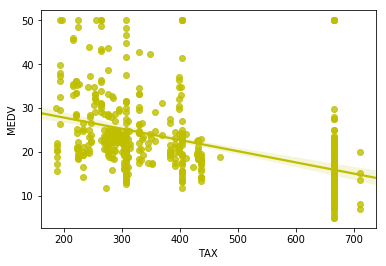

In [53]:
sns.regplot(data['TAX'],prices1,color="y")
plt.show()

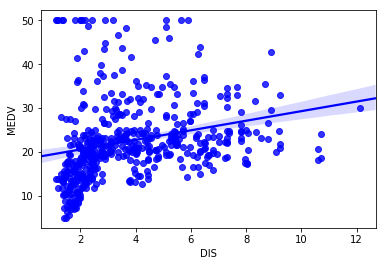

In [54]:
sns.regplot(data['DIS'],prices1,color="b")
plt.show()

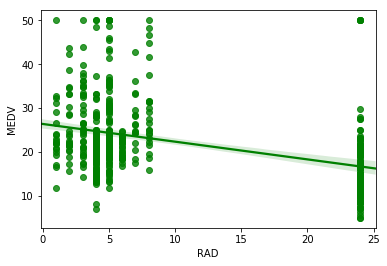

In [55]:
sns.regplot(data['RAD'],prices1,color="g")
plt.show()

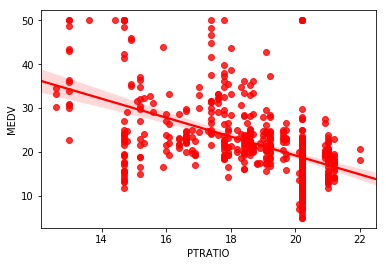

In [56]:
sns.regplot(data['PTRATIO'],prices1,color="r")
plt.show()

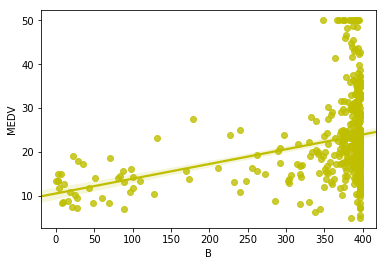

In [57]:
sns.regplot(data['B'],prices1,color="y")
plt.show()

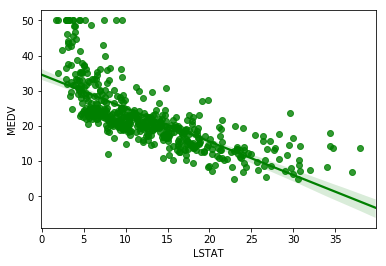

In [58]:
sns.regplot(data['LSTAT'],prices1,color="g")
plt.show()

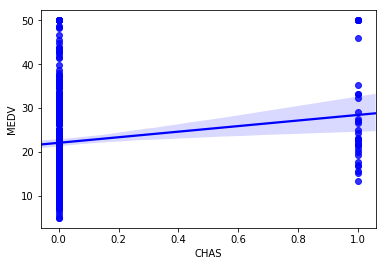

In [59]:
sns.regplot(data['CHAS'],prices1,color="b")
plt.show()

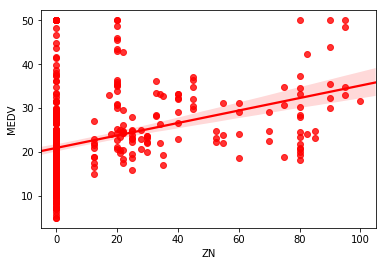

In [60]:
sns.regplot(data['ZN'],prices1,color="r")
plt.show()

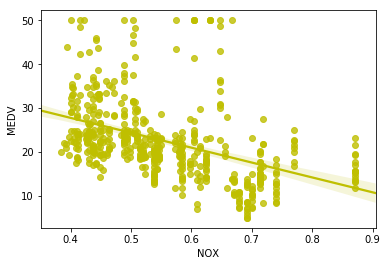

In [61]:
sns.regplot(data['NOX'],prices1,color="y")
plt.show()

<h1>Feature Selection</h1>
<p>As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):</p>
<p>'RM' : is the average number of rooms among homes in the neighborhood.</p>
<p>'LSTAT' : is the percentage of homeowners in the neighborhood considered “lower class” (working poor).</p>
<p>'PTRATIO' : is the ratio of students to teachers in primary and secondary schools in the neighborhood.</p>

<h4>RM:-</h4>
<p>An increase in the value of this feature will lead to an increase in the value of ‘MEDV’. This is because for you’d expect a home with a higher number of rooms to be more expensive that a home with lower number of rooms.</p>
<h4>LSTAT:-</h4>
<p>An increase in the value of this feature will lead to a decrease in the value of ‘MEDV’. A lower class homeowner might not be able to afford expensive houses, so you’d expect them to leave in a cheaper home. A higher percentage of such people could correlate to cheaper homes in an area, and thus, a lower ‘MEDV’ value.</p>
<h4>PTRATIO:-</h4>
<p> An increase in the value of this feature will lead to an decrease in the value of ‘MEDV’. A low student to teacher ration is typically associated with better education level of a school, as a teacher is able to focus on individual students better (than if there were more students). So, due to the presence of better quality schools, people might be willing to pay more to live in those areas, to provide their children with better education, and the prices might be higher.</p>

In [62]:
data1 = data.drop(['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B'],axis = 1)

<h1>Data Exploration</h1>
<p>Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we have separated the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.</p>

In [63]:
data1.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [66]:
prices = data1['MEDV']
features = data1.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data1.shape))

Boston housing dataset has 506 data points with 4 variables each.


In [67]:
features.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [128]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics 
print ("Statistics for Boston housing dataset in $1000 :\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset in $1000 :

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


<p3>Based on the above observations we will RM , PTRATIO and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.</p3>

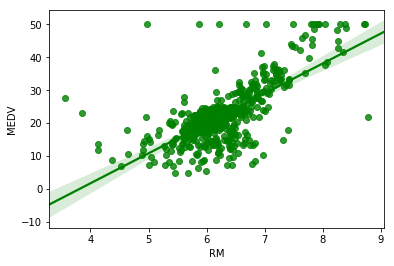

In [137]:
sns.regplot(data1['RM'],prices,color='g')
plt.show()

<p>The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.</p>

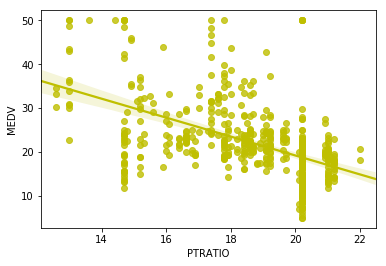

In [138]:
sns.regplot(data1['PTRATIO'],prices,color='y')
plt.show()

<p>The prices tend to decrease with an increase in PTRATIO. Though it doesn’t look to be following exactly a linear line.</p>

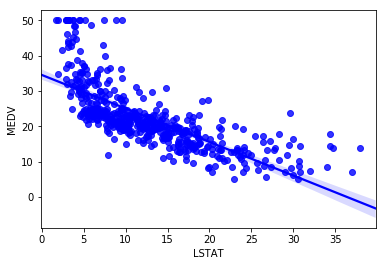

In [139]:
sns.regplot(data1['LSTAT'],prices,color='b')
plt.show()

<p>The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.</p>

<h1>Preparing the data for training the model</h1>

<h2>Splitting the data into training and testing sets:</h2>

<p>Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.</p>

In [106]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.29,random_state=9)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(359, 3)
(147, 3)
(359,)
(147,)


<h1>Training and testing the model:</h1>
<p>We use scikit-learn’s LinearRegression to train our model on both the training and test sets.</p>

In [108]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

Y_tr = lm.predict(X_train)
Y_pred = lm.predict(X_test)

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

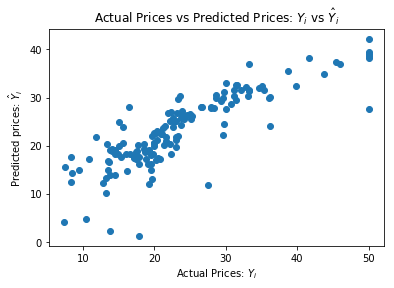

In [132]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [133]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':Y_pred})
df2 = df1.tail(10)
df2


,Actual,Predicted
188,29.8,31.081461
375,15.0,25.026756
103,19.3,19.169949
232,41.7,38.260163
44,21.2,23.710423
287,23.2,26.842647
68,17.4,18.710927
473,29.8,24.549541
76,20.0,22.572675
257,50.0,42.274452


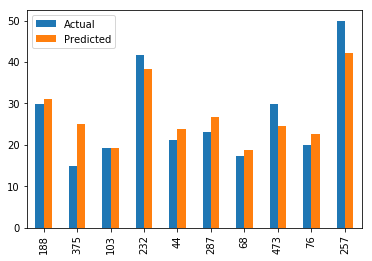

In [134]:
df2.plot(kind = 'bar')

<h1>Model evaluation</h1>
<p>We will evaluate our model using RMSE and R2-score.</p>

In [135]:
# model evaluation for training set
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

r2_score = r2_score(y_train, y_train_predict)
mse = mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2_score))
print("\n")

The model performance for training set
--------------------------------------
MSE is 27.460743358830523
R2 score is 0.6621720535275957




In [136]:
# model evaluation for training set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mse = mean_squared_error(y_test, y_test_predict)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print("MSE is {}".format(mse))
print('R2 score is {}'.format(r2_score))
print("\n")

The model performance for testing set
--------------------------------------
MSE is 26.446112618897992
R2 score is 0.7084249021493991




<h1>Correlation Matrix</h1>
<p>A great follow up to the pairplot is the correlation matrix. The correlation matrix displays the correlations for each pair of variables in the dataset and can make it easy to spot correlated features.</p>

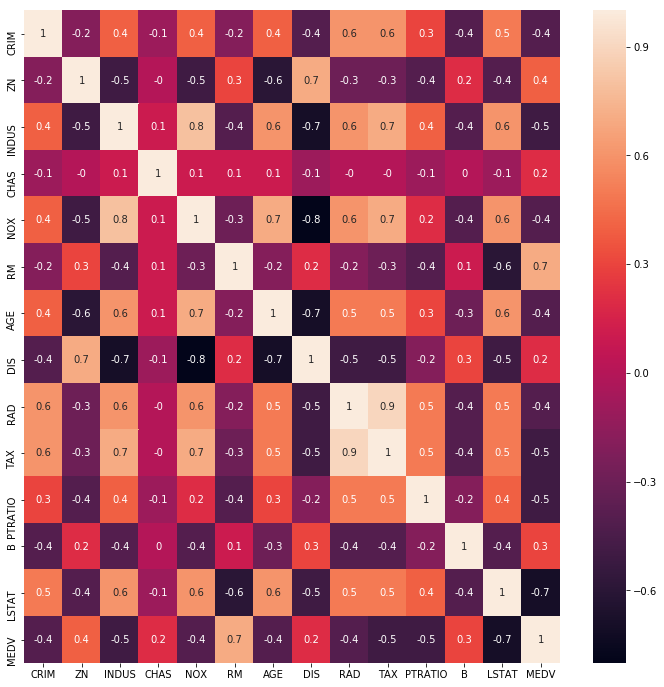

In [79]:
correlation_matrix =data.corr().round(1)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True)

<p>The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.</p>

<h1>Observations</h1>

<p1>To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).</p1>

<p2>An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.</p2>

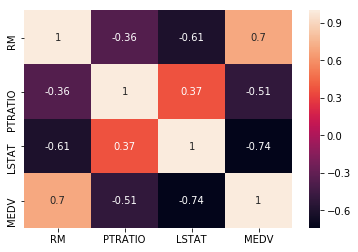

In [80]:
correlation_matrix = data1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

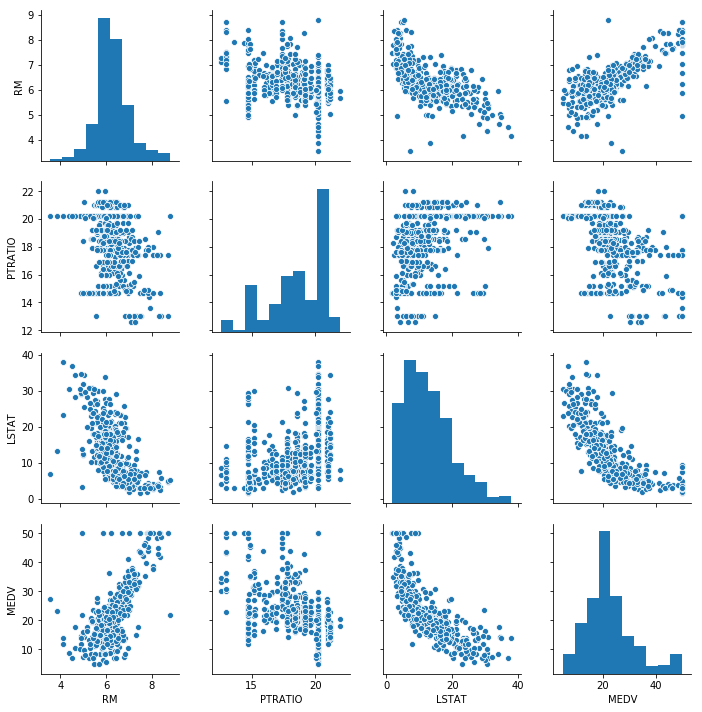

In [81]:
sns.pairplot(data1)

<h2>Predicting Selling Prices</h2>
<p>Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:</p>
<h4>Feature--> Client 1--Client 2--Client 3</h4>
<h4>Total numberof rooms in home--> 5 rooms--5 rooms--8 rooms</h4>

<h4>Student-teacher ratio of nearby schools--> 15-to-1--20-to-1--12-to-1</h4>
<h4>Neighborhood poverty level (as %)--> 17%--25%--3%</h4>

In [119]:
# Produce a matrix for client data
client_data = [[5, 15, 17], # Client 1 #RM, PTRATIO, LSTAT
               [5, 20, 25], # Client 2 #RM, PTRATIO, LSTAT
               [8, 12, 3]]  # Client 3 #RM, PTRATIO, LSTAT

# Show predictions
for i, price in enumerate(lm.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $17.29
Predicted selling price for Client 2's home: $8.36
Predicted selling price for Client 3's home: $41.22


In [121]:
# Produce a matrix for client data
client_data = [[5, 13, 30], # Client 1 #RM, PTRATIO, LSTAT
               [8, 25, 20], # Client 2 #RM, PTRATIO, LSTAT
               [12, 15, 25]]  # Client 3 #RM, PTRATIO, LSTAT

# Show predictions
for i, price in enumerate(lm.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $11.70
Predicted selling price for Client 2's home: $20.15
Predicted selling price for Client 3's home: $43.96


<h1>Conclusion</h1>
<p>In this story, we applied the concepts of linear regression on the Boston housing dataset.</p>

Applicability

> 1.) Age of the data set is way too old to predict something useful for present senario of housing schemes. It may happen that certain factors which were relevant then are of no use today. Definitly the economic conditions have changed around the globe over time and hence the predicted pricing model cannot be used in today time.
>
> 2.) Taking  into consideration student:teacher ratio for estimating house pricing is totally outcasted as now we do not depend on local school for our kid's edudation, So it hardly matter if we have a proper school in our locality or not for us to buy a house.
>
> 3.) The features discussed in the dataset are not sufficient to describe the complete housing deal. There are many other factor like interior of the house , exterior of the house, Accessibility in terms of transportation , age of the property which are equally important while making such deal
>
> 4.)Data collected in an urban city like Boston will not be applicable in a rural city , it can be used only in similar urban cities. The price level will be completely different depending on geographical demarcations.
>
>5.)The model is not robust enough to make consistent predictions. As it can be seen in the sensitivity section, range in prices is around dollar 73k which might be significant.

<h1>THANK YOU!</h1>